In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\nasabah\regresi\data_baru\new_data.csv")
df.head()

,Unnamed: 0,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,debtor_education_level,aging,loss_reverse
0,0,3.0,15500000.0,62500000.0,21.0,2.0,1.0,670.0,0.0,11000000.0,D3,DPK,0.0
1,1,3.0,17500000.0,70833333.0,18.0,31.0,3.0,402.0,1.0,17000000.0,D3,DPK,17708333.0
2,2,4.0,17500000.0,59333333.0,17.0,0.0,0.0,505.0,0.0,14500000.0,D2,Lancar,0.0
3,3,3.0,15500000.0,61166667.0,17.0,64.0,5.0,508.0,1.0,11500000.0,D2,DPK,15291667.0
4,4,5.0,8700000.0,56166667.0,15.0,14.0,2.0,371.0,0.0,5500000.0,SMA,DPK,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   number_of_dependents    5000 non-null   float64
 2   net_income              5000 non-null   float64
 3   loan_amount             5000 non-null   float64
 4   tenor                   5000 non-null   float64
 5   amount_of_late          5000 non-null   float64
 6   late_payment_amount     5000 non-null   float64
 7   credit_score            5000 non-null   float64
 8   arrears_amounts         5000 non-null   float64
 9   aset                    5000 non-null   float64
 10  debtor_education_level  5000 non-null   object 
 11  aging                   5000 non-null   object 
 12  loss_reverse            5000 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 507.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   number_of_dependents    5000 non-null   float64 
 1   net_income              5000 non-null   float64 
 2   loan_amount             5000 non-null   float64 
 3   tenor                   5000 non-null   float64 
 4   amount_of_late          5000 non-null   float64 
 5   late_payment_amount     5000 non-null   float64 
 6   credit_score            5000 non-null   float64 
 7   arrears_amounts         5000 non-null   float64 
 8   aset                    5000 non-null   float64 
 9   debtor_education_level  5000 non-null   category
 10  aging                   5000 non-null   category
 11  loss_reverse            5000 non-null   float64 
dtypes: category(2), float64(10)
memory usage: 401.1 KB


In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,debtor_education_level,aging
0,0.0,0.000000,0.190476,0.909091,-0.800000,-0.6,1.589041,-1.0,0.6,-0.928218,2,0
1,0.0,0.266667,0.984127,0.636364,-0.413333,-0.2,0.365297,0.0,1.8,0.123762,2,0
2,0.5,0.266667,-0.111111,0.545455,-0.826667,-0.8,0.835616,-1.0,1.3,-0.928218,1,3
3,0.0,0.000000,0.063492,0.545455,0.026667,0.2,0.849315,0.0,0.7,-0.019802,1,0
4,1.0,-0.906667,-0.412698,0.363636,-0.640000,-0.4,0.223744,-1.0,-0.5,-0.928218,7,0


In [6]:
y = df2["loss_reverse"]
X = df2.drop("loss_reverse", axis=1)
pca = PCA()
pca.fit(X)

PCA()

In [7]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

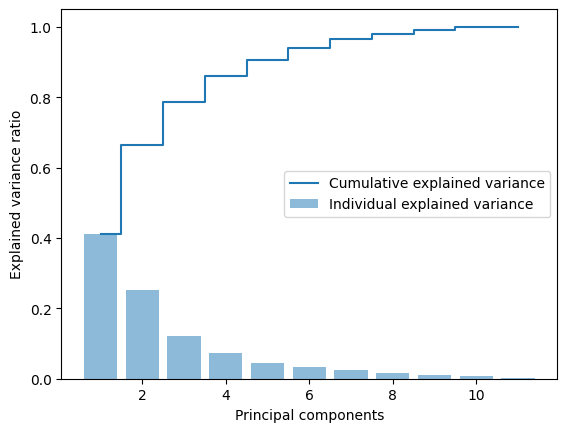

In [8]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [9]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 6
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: aging, credit_score, tenor, net_income, debtor_education_level, loan_amount
Komponen Utama 2: credit_score, net_income, tenor, number_of_dependents, loan_amount, debtor_education_level
Komponen Utama 3: tenor, credit_score, late_payment_amount, amount_of_late, aging, arrears_amounts
Komponen Utama 4: arrears_amounts, loan_amount, tenor, credit_score, number_of_dependents, aset
Komponen Utama 5: tenor, credit_score, late_payment_amount, amount_of_late, arrears_amounts, aging
Komponen Utama 6: loan_amount, net_income, tenor, number_of_dependents, arrears_amounts, credit_score
Komponen Utama 7: debtor_education_level, loan_amount, credit_score, tenor, net_income, number_of_dependents
Komponen Utama 8: amount_of_late, late_payment_amount, credit_score, arrears_amounts, number_of_dependents, net_income
Komponen Utama 9: net_income, arrears_amounts, amount_of_late, late_payment_amount, credit_score, tenor
Komponen Utama 10: credit_score, ten

In [10]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 8


In [11]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=6)
z = select.fit_transform(X, y) 

In [12]:
filterr = select.get_support()
features[filterr]

array(['net_income', 'loan_amount', 'amount_of_late',
       'late_payment_amount', 'arrears_amounts', 'aging'], dtype=object)

In [13]:
num_features_to_select = 6
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)



In [14]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 net_income
2 loan_amount
3 amount_of_late
4 late_payment_amount
5 credit_score
6 arrears_amounts


In [15]:
for i in columns:
    if i in df.columns:
        df2[i] = columns[i].inverse_transform(df2[i])

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,debtor_education_level,aging
0,3.0,15500000.0,62500000.0,21.0,2.0,1.0,670.0,0.0,11000000.0,0.0,D3,DPK
1,3.0,17500000.0,70833333.0,18.0,31.0,3.0,402.0,1.0,17000000.0,17708333.0,D3,DPK
2,4.0,17500000.0,59333333.0,17.0,0.0,0.0,505.0,0.0,14500000.0,0.0,D2,Lancar
3,3.0,15500000.0,61166667.0,17.0,64.0,5.0,508.0,1.0,11500000.0,15291667.0,D2,DPK
4,5.0,8700000.0,56166667.0,15.0,14.0,2.0,371.0,0.0,5500000.0,0.0,SMA,DPK


In [16]:
df_new = df2[selected_feature_names]
df_new["loss_reverse"] = df2["loss_reverse"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_3768\2143404179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["loss_reverse"] = df2["loss_reverse"]


,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,15500000.0,62500000.0,2.0,1.0,670.0,0.0,0.0
1,17500000.0,70833333.0,31.0,3.0,402.0,1.0,17708333.0
2,17500000.0,59333333.0,0.0,0.0,505.0,0.0,0.0
3,15500000.0,61166667.0,64.0,5.0,508.0,1.0,15291667.0
4,8700000.0,56166667.0,14.0,2.0,371.0,0.0,0.0


In [17]:
df_new["loss_reverse"].value_counts()

loss_reverse
0.0            759
14958333.0      45
15250000.0      38
14708333.0      38
14625000.0      37
              ... 
56166667.0       1
106125000.0      1
49166667.0       1
8000000.0        1
9791667.0        1
Name: count, Length: 874, dtype: int64

In [18]:
df_new.to_csv("./data/data_for_clustering.csv")